In [1]:
from utils_behavior import Ballpushing_utils

from utils_behavior import Sleap_utils

from pathlib import Path

import importlib

In [10]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [11]:
TestFly_path = Path("/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240531_MagnetBlock_Videos_Tracked/arena4/corridor4/")

In [12]:
# F1 exp
TestFly_path = Path("/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena4/Left")


In [15]:
TestSlp = Sleap_utils.Sleap_Tracks("/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena4/Left/arena4_left_tracked_ball_processed.000_arena4_left.analysis.h5")

In [18]:
TestSlp.objects[0].centre

In [13]:
TestFly = Ballpushing_utils.Fly(TestFly_path, as_individual=True)

y2: 0         294.419014
1         294.419055
2         294.419096
3         294.419138
4         294.419179
             ...    
261001    175.920539
261002    175.920624
261003    175.920710
261004    175.920796
261005    175.920881
Name: y_centre, Length: 261006, dtype: float64
Interaction events for fly 1 and ball 1: [[np.int64(6162), np.int64(6305), np.int64(143)], [np.int64(9107), np.int64(9208), np.int64(101)], [np.int64(10667), np.int64(10881), np.int64(214)], [np.int64(18523), np.int64(18625), np.int64(102)], [np.int64(21321), np.int64(21421), np.int64(100)], [np.int64(21833), np.int64(21960), np.int64(127)], [np.int64(27976), np.int64(28045), np.int64(69)], [np.int64(29650), np.int64(29909), np.int64(259)], [np.int64(30792), np.int64(31029), np.int64(237)], [np.int64(32784), np.int64(33044), np.int64(260)], [np.int64(33536), np.int64(33601), np.int64(65)], [np.int64(34444), np.int64(34577), np.int64(133)], [np.int64(35487), np.int64(35603), np.int64(116)], [np.int64(36519), n

In [24]:
# Let's make 2 annotated videos for each push / pull event

# First, let's get the push / pull events

pushes = TestFly.metrics["fly_1_ball_1"]["events_direction"][0]

pulls = TestFly.metrics["fly_1_ball_1"]["events_direction"][1]

In [172]:
# Now for the two first pushes and pulls, let's make the videos

for push in pushes[:2]:
    TestFly.flytrack.generate_annotated_video(save=True, output_path = f"/mnt/upramdya_data/MD/Other_Videos/Events_annotation/push{push}.mp4"
    , start = push[0], end = push[1])
for pull in pulls[:2]:
    TestFly.flytrack.generate_annotated_video(save=True, output_path = f"/mnt/upramdya_data/MD/Other_Videos/Events_annotation/pull{pull}.mp4"
    , start = pull[0], end = pull[1])
    
    

No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 219/219 [00:05<00:00, 37.80it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 389/389 [00:09<00:00, 38.91it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 585/585 [00:15<00:00, 38.98it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 111/111 [00:03<00:00, 33.20it/s]


In [159]:
TestFly.metrics["fly_1_ball_1"]["events_direction"]

([[np.int64(53651), np.int64(53869), np.int64(218)],
  [np.int64(56493), np.int64(56603), np.int64(110)],
  [np.int64(59233), np.int64(59302), np.int64(69)],
  [np.int64(59711), np.int64(60034), np.int64(323)],
  [np.int64(62187), np.int64(62274), np.int64(87)],
  [np.int64(66494), np.int64(66807), np.int64(313)],
  [np.int64(69427), np.int64(70538), np.int64(1111)]],
 [[np.int64(54166), np.int64(54554), np.int64(388)],
  [np.int64(55126), np.int64(55710), np.int64(584)],
  [np.int64(56022), np.int64(56101), np.int64(79)],
  [np.int64(56889), np.int64(57498), np.int64(609)],
  [np.int64(58541), np.int64(58654), np.int64(113)],
  [np.int64(60964), np.int64(61259), np.int64(295)],
  [np.int64(64498), np.int64(64575), np.int64(77)],
  [np.int64(67637), np.int64(68002), np.int64(365)],
  [np.int64(68769), np.int64(69006), np.int64(237)],
  [np.int64(142259), np.int64(142486), np.int64(227)],
  [np.int64(145511), np.int64(145866), np.int64(355)]])

In [98]:
78416 / 29

2704.0

In [99]:
2704 / 60

45.06666666666667

In [100]:
TestFly.FeedingState

'starved_noWater'

In [101]:
TestFly.interaction_events

{1: {1: [[np.int64(52980), np.int64(53066), np.int64(86)],
   [np.int64(53651), np.int64(53869), np.int64(218)],
   [np.int64(54166), np.int64(54554), np.int64(388)],
   [np.int64(55126), np.int64(55710), np.int64(584)],
   [np.int64(56022), np.int64(56101), np.int64(79)],
   [np.int64(56493), np.int64(56603), np.int64(110)],
   [np.int64(56889), np.int64(57498), np.int64(609)],
   [np.int64(58191), np.int64(58289), np.int64(98)],
   [np.int64(58541), np.int64(58654), np.int64(113)],
   [np.int64(59233), np.int64(59302), np.int64(69)],
   [np.int64(59711), np.int64(60034), np.int64(323)],
   [np.int64(60964), np.int64(61259), np.int64(295)],
   [np.int64(62187), np.int64(62274), np.int64(87)],
   [np.int64(63039), np.int64(63100), np.int64(61)],
   [np.int64(63554), np.int64(63620), np.int64(66)],
   [np.int64(64498), np.int64(64575), np.int64(77)],
   [np.int64(65043), np.int64(65159), np.int64(116)],
   [np.int64(65870), np.int64(66007), np.int64(137)],
   [np.int64(66494), np.int64(

In [102]:
TestFly.get_events_number()

Number of events for 1: 1


{1: 1}

In [106]:
TestFly.metrics["fly_1_ball_1"]

{'final_event': ([np.int64(78416), np.int64(78777), np.int64(361)], 23),
 'significant_events': [[np.int64(53651), np.int64(53869), np.int64(218)],
  [np.int64(54166), np.int64(54554), np.int64(388)],
  [np.int64(55126), np.int64(55710), np.int64(584)],
  [np.int64(56022), np.int64(56101), np.int64(79)],
  [np.int64(56493), np.int64(56603), np.int64(110)],
  [np.int64(56889), np.int64(57498), np.int64(609)],
  [np.int64(58541), np.int64(58654), np.int64(113)],
  [np.int64(59233), np.int64(59302), np.int64(69)],
  [np.int64(59711), np.int64(60034), np.int64(323)],
  [np.int64(60964), np.int64(61259), np.int64(295)],
  [np.int64(62187), np.int64(62274), np.int64(87)],
  [np.int64(64498), np.int64(64575), np.int64(77)],
  [np.int64(66494), np.int64(66807), np.int64(313)],
  [np.int64(67637), np.int64(68002), np.int64(365)],
  [np.int64(68769), np.int64(69006), np.int64(237)],
  [np.int64(69427), np.int64(70538), np.int64(1111)],
  [np.int64(142259), np.int64(142486), np.int64(227)],
  [np

In [115]:
final_event[0][0]

np.int64(78416)

In [141]:
# Make an annotated video of the final event of the fly
final_event = TestFly.metrics["fly_1_ball_1"]["final_event"]

TestFly.balltrack.generate_annotated_video(
    save=True,
    output_path = "/mnt/upramdya_data/MD/Other_Videos/Events_annotation/final_event.mp4",
    start=final_event[0][0],
    end = final_event[0][1]
)


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 610/610 [00:15<00:00, 38.82it/s]


In [121]:
TestFly.interaction_events

{1: {1: [[np.int64(52980), np.int64(53066), np.int64(86)],
   [np.int64(53651), np.int64(53869), np.int64(218)],
   [np.int64(54166), np.int64(54554), np.int64(388)],
   [np.int64(55126), np.int64(55710), np.int64(584)],
   [np.int64(56022), np.int64(56101), np.int64(79)],
   [np.int64(56493), np.int64(56603), np.int64(110)],
   [np.int64(56889), np.int64(57498), np.int64(609)],
   [np.int64(58191), np.int64(58289), np.int64(98)],
   [np.int64(58541), np.int64(58654), np.int64(113)],
   [np.int64(59233), np.int64(59302), np.int64(69)],
   [np.int64(59711), np.int64(60034), np.int64(323)],
   [np.int64(60964), np.int64(61259), np.int64(295)],
   [np.int64(62187), np.int64(62274), np.int64(87)],
   [np.int64(63039), np.int64(63100), np.int64(61)],
   [np.int64(63554), np.int64(63620), np.int64(66)],
   [np.int64(64498), np.int64(64575), np.int64(77)],
   [np.int64(65043), np.int64(65159), np.int64(116)],
   [np.int64(65870), np.int64(66007), np.int64(137)],
   [np.int64(66494), np.int64(

In [125]:
# Plot the ball position during the final event and the 4 previous events

final_event_idx = final_event[1]

events = TestFly.interaction_events[1][1]
 
events_idx = [final_event_idx - 4, final_event_idx - 3, final_event_idx - 2, final_event_idx - 1, final_event_idx]

events_idx

[19, 20, 21, 22, 23]

In [126]:
events[19]

[np.int64(67637), np.int64(68002), np.int64(365)]

In [129]:
for i in events_idx:
    TestFly.balltrack.generate_annotated_video(
        start=events[i][0],
        end=events[i][1],
        save=True,
        output_path = f"/mnt/upramdya_data/MD/Other_Videos/Events_annotation/event_{i}.mp4"
    )

No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 366/366 [00:09<00:00, 37.77it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 238/238 [00:06<00:00, 36.93it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 1112/1112 [00:32<00:00, 34.37it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 201/201 [00:05<00:00, 35.84it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 362/362 [00:09<00:00, 37.90it/s]


In [130]:
# Plot the ball positions

positions = TestFly.balltrack.dataset

positions

,frame,time,object,x_centre,y_centre
0,1,0.034483,ball_1,48.438969,337.431762
1,2,0.068966,ball_1,48.439048,337.431753
2,3,0.103448,ball_1,48.439126,337.431744
3,4,0.137931,ball_1,48.439205,337.431736
4,5,0.172414,ball_1,48.439284,337.431727
...,...,...,...,...,...
156598,156599,5399.965517,ball_1,47.108495,115.377940
156599,156600,5400.000000,ball_1,47.103990,115.382139
156600,156601,5400.034483,ball_1,47.099485,115.386337
156601,156602,5400.068966,ball_1,47.094980,115.390535


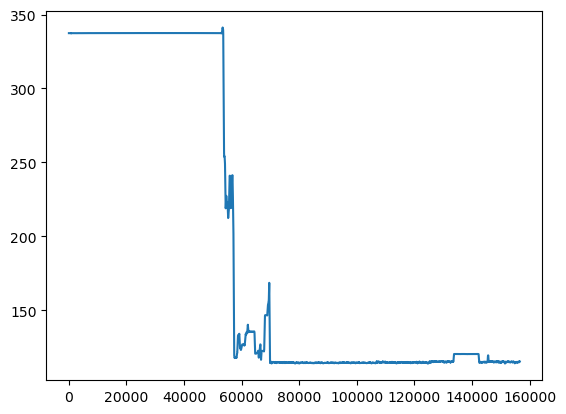

In [131]:
# Plot the y_centre of the ball over time

import matplotlib.pyplot as plt

plt.plot(positions["y_centre"])
plt.show()

In [132]:
# Generate relative positions based on the y_centre

positions["y_relative"] = abs(positions["y_centre"] - positions["y_centre"].iloc[0])

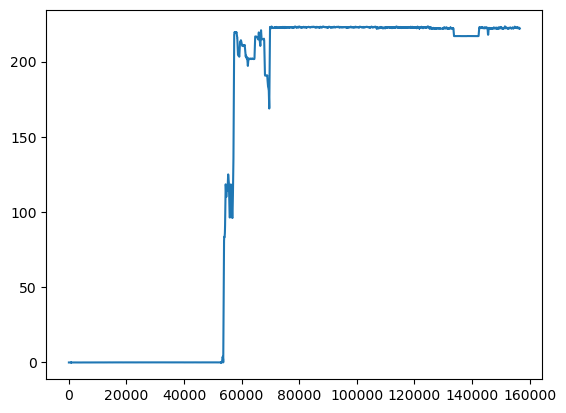

In [133]:
plt.plot(positions["y_relative"])
plt.show()

In [134]:
# get max relative position

max_relative = positions["y_relative"].max()

In [35]:
TestFly.fly_skeleton

In [53]:
TestFly.get_final_event()

{'training': ([np.int64(1190), np.int64(1327), np.int64(137)], 1)}

In [54]:
TestFly.find_events_direction()

{'training': ([[np.int64(407), np.int64(575), np.int64(168)],
   [np.int64(4505), np.int64(4994), np.int64(489)],
   [np.int64(54024), np.int64(54403), np.int64(379)],
   [np.int64(75614), np.int64(76629), np.int64(1015)],
   [np.int64(82840), np.int64(83400), np.int64(560)],
   [np.int64(88671), np.int64(88894), np.int64(223)],
   [np.int64(94103), np.int64(96361), np.int64(2258)]],
  [[np.int64(1848), np.int64(1961), np.int64(113)],
   [np.int64(58404), np.int64(59573), np.int64(1169)],
   [np.int64(87235), np.int64(88421), np.int64(1186)]])}

In [46]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [47]:
TestFly_F1 = Ballpushing_utils.Fly("/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right", as_individual=True)

Processing fly 1/1
smoothing tracks
Loaded SLEAP tracking file: /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right/arena6_right_rotated_tracked_fly.000_arena6_right_rotated.analysis.h5
N° of objects: 1
Nodes: ['thorax']
Video FPS: 29.0
Processing ball 1/2
smoothing tracks
Processing ball 2/2
smoothing tracks
Loaded SLEAP tracking file: /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right/arena6_right_rotated_tracked_ball_processed.000_arena6_right_rotated.analysis.h5
N° of objects: 2
Nodes: ['centre']
Video FPS: 29.0
Processing ball index: 1
Non-NaN xfly count: 261006, Non-NaN xball count: 261006
Initial separation: 176.94497394316858
Processing ball index: 2
Non-NaN xfly count: 261006, Non-NaN xball count: 0
No valid tracking data for xfly or xball for 2
Final data_dict keys: ['generalisation']
Processing ball type: generalisation
        yball       xball        yfly       xfly  Frame      time  ball_idx  \
0  420.19

KeyError: 'generalisation'

In [23]:
# Load the sleaptrack for the ball for this fly

Slp_test = Sleap_utils.Sleap_Tracks("/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right/arena6_right_rotated_tracked_ball_processed.000_arena6_right_rotated.analysis.h5")

Processing object 1/2
smoothing tracks
Processing object 2/2
smoothing tracks
Loaded SLEAP tracking file: /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right/arena6_right_rotated_tracked_ball_processed.000_arena6_right_rotated.analysis.h5
N° of objects: 2
Nodes: ['centre']
Video FPS: 29.0


In [24]:
Slp_data = Slp_test.dataset

In [91]:
TestFly_F1.find_interaction_events()

{'training': [[np.int64(1462), np.int64(1530), np.int64(68)],
  [np.int64(2095), np.int64(2303), np.int64(208)],
  [np.int64(10405), np.int64(10715), np.int64(310)],
  [np.int64(13479), np.int64(13544), np.int64(65)],
  [np.int64(15629), np.int64(15854), np.int64(225)],
  [np.int64(25725), np.int64(25807), np.int64(82)],
  [np.int64(26775), np.int64(26844), np.int64(69)],
  [np.int64(28589), np.int64(28685), np.int64(96)],
  [np.int64(31717), np.int64(31822), np.int64(105)],
  [np.int64(32033), np.int64(32147), np.int64(114)],
  [np.int64(32855), np.int64(33147), np.int64(292)],
  [np.int64(34537), np.int64(34715), np.int64(178)],
  [np.int64(36221), np.int64(36490), np.int64(269)],
  [np.int64(38106), np.int64(38195), np.int64(89)],
  [np.int64(38465), np.int64(38592), np.int64(127)],
  [np.int64(38827), np.int64(38891), np.int64(64)],
  [np.int64(41289), np.int64(42055), np.int64(766)],
  [np.int64(43416), np.int64(43479), np.int64(63)],
  [np.int64(44527), np.int64(44787), np.int64(

In [94]:
TestFly_F1.find_adjusted_time([10, 20, 50])

{'training': ({10: np.float64(1059.1333333333334),
   20: np.float64(1096.9666666666667),
   50: np.float64(3061.633333333333)},
  {10: nan, 20: nan, 50: nan}),
 'generalisation': ({10: np.float64(5189.133333333333),
   20: np.float64(5233.5),
   50: np.float64(5644.9)},
  {10: np.float64(2020.0333333333333),
   20: np.float64(2064.4),
   50: np.float64(2475.7999999999997)})}

In [21]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [22]:
TestExp_F1 = Ballpushing_utils.Experiment("/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked")

[PosixPath('/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena2/Right/arena2_right_rotated.mp4'), PosixPath('/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena7/Right/arena7_right_rotated.mp4'), PosixPath('/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right/arena6_right_rotated.mp4'), PosixPath('/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena5/Right/arena5_right_rotated.mp4'), PosixPath('/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena8/Right/arena8_right_rotated.mp4'), PosixPath('/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena3/Right/arena3_right_rotated.mp4'), PosixPath('/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena4/Right/arena4_right_rotated.mp4'), PosixPath('/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena1/Right/arena1_right_rotated.mp4'),

KeyError: 'generalisation'

In [128]:
data = Ballpushing_utils.Dataset(TestExp_F1)

In [129]:
str(data)

'Dataset with 9 flies and 1 experiments\nkeyword: '

In [133]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [134]:
data.generate_dataset()

An error occurred: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


Traceback (most recent call last):
  File "/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py", line 1842, in generate_dataset
    for fly in self.flies:
                      ^^^^
  File "/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py", line 1893, in _prepare_dataset_coordinates
    pandas.DataFrame: A DataFrame containing the fly's coordinates and associated metadata.
       ^^^^^^^^^^^^
  File "/home/durrieu/miniforge3/envs/tracking_analysis/lib/python3.12/site-packages/pandas/core/generic.py", line 1577, in __nonzero__
    raise ValueError(
ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


{}